In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("C:\\Users\\dines\\Desktop\\Python practice\\is\\Dataset-master\\k_circle_sales.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [7]:
data.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.5,OUT046,1997,Small,Tier1,Supermarket Type1,765.6700,14.6


# Descriptive stats

In [8]:
#1.Mean
data["Item_Outlet_Sales"]

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [9]:
data["Item_Outlet_Sales"].mean()

2181.2889135750365

In [10]:
round(data["Item_Outlet_Sales"].mean(),2)

2181.29

The average sales revenue generated by selling diffrent items accross diffrent outlet is 2181rs

In [14]:
#show coloums
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [15]:
num_data = data[["Item_Outlet_Sales","Item_Visibility","Item_Weight","Item_MRP","Profit"]]

In [16]:
num_data.head(2)

,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_MRP,Profit
0,3735.1380,0.016047,9.30,249.8,11.5
1,443.4228,0.019278,5.92,48.3,14.3


In [17]:
num_data.mean()

Item_Outlet_Sales    2181.288914
Item_Visibility         0.066132
Item_Weight            11.676740
Item_MRP              140.998838
Profit                 13.414514
dtype: float64

In [33]:
#descriptive result
desc_res = pd.DataFrame()
desc_res['Mean']=round(num_data.mean(),3)
desc_res['Median']=round(num_data.median(),3)
desc_res['variance']=round(num_data.var(),2)
desc_res['SD']=round(num_data.std(),3)
desc_res['Coef_var']=round(num_data.std()/num_data.mean()*100,2)
desc_res['q1_25Per']=round(num_data.quantile(0.25),2)
desc_res['q1_75Per']=round(num_data.quantile(0.75),2)
desc_res['IQR']=round(num_data.quantile(0.75)-num_data.quantile(0.25),3)
desc_res

,Mean,Median,variance,SD,Coef_var,q1_25Per,q1_75Per,IQR
Item_Outlet_Sales,2181.289,1794.331,2912140.94,1706.500,78.23,834.25,3101.30,2267.049
Item_Visibility,0.066,0.054,0.00,0.052,78.02,0.03,0.09,0.068
Item_Weight,11.677,11.800,33.37,5.777,49.47,7.72,16.50,8.780
Item_MRP,140.999,142.700,3876.07,62.258,44.16,93.80,185.65,91.850
Profit,13.415,13.900,2.90,1.702,12.69,13.15,14.30,1.150


In [28]:
num_data['Item_Outlet_Sales'].quantile(0.9995)

10293.550964999979

In [29]:
1-0.9995

0.0004999999999999449

#quantile is the measure to understand a measure of separating the targets 0.25 means 75% whar they are geting

In [36]:
q3=num_data['Item_Outlet_Sales'].quantile(0.75)
q1=num_data['Item_Outlet_Sales'].quantile(0.25)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr

print("Upper bound",ub)
print("lower bound",lb)

Upper bound 6501.8699
lower bound -2566.3261


Sales cannot be negative , so no oulayer in negative , but in positive anything above 6501.86 is outlier

In [37]:
import seaborn as sb

In [40]:
from matplotlib import pyplot as plt

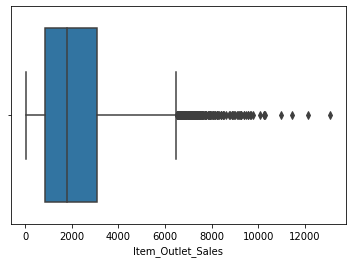

In [46]:
sb.boxplot(x=num_data["Item_Outlet_Sales"])

In [47]:
    num_data["Item_Outlet_Sales"]>ub

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Outlet_Sales, Length: 8523, dtype: bool

In [49]:
(num_data["Item_Outlet_Sales"]>ub).sum()

186

Sum of all the outlier true cases

In [50]:
(num_data["Item_Outlet_Sales"]>ub).sum()/len(data)*100

2.1823301654347063

the above is the percentage of outlayers in cost

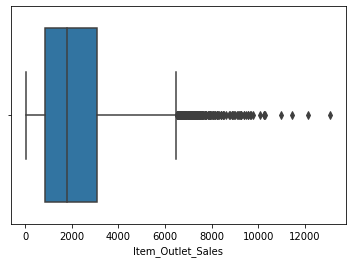

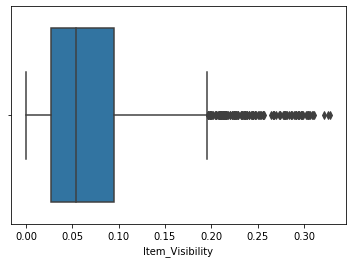

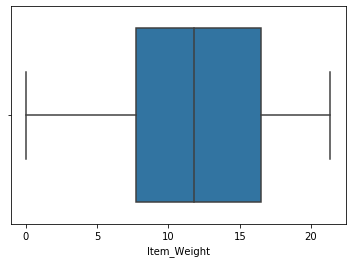

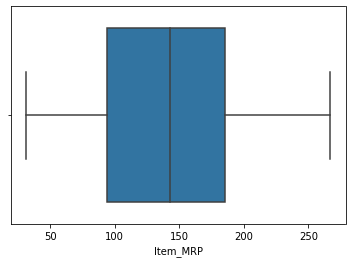

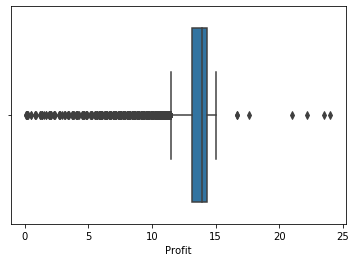

In [57]:
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()

In [58]:
desc_res

,Mean,Median,variance,SD,Coef_var,q1_25Per,q1_75Per,IQR
Item_Outlet_Sales,2181.289,1794.331,2912140.94,1706.500,78.23,834.25,3101.30,2267.049
Item_Visibility,0.066,0.054,0.00,0.052,78.02,0.03,0.09,0.068
Item_Weight,11.677,11.800,33.37,5.777,49.47,7.72,16.50,8.780
Item_MRP,140.999,142.700,3876.07,62.258,44.16,93.80,185.65,91.850
Profit,13.415,13.900,2.90,1.702,12.69,13.15,14.30,1.150


In [62]:
desc_res.drop('variance',axis=1)

,Mean,Median,SD,Coef_var,q1_25Per,q1_75Per,IQR
Item_Outlet_Sales,2181.289,1794.331,1706.500,78.23,834.25,3101.30,2267.049
Item_Visibility,0.066,0.054,0.052,78.02,0.03,0.09,0.068
Item_Weight,11.677,11.800,5.777,49.47,7.72,16.50,8.780
Item_MRP,140.999,142.700,62.258,44.16,93.80,185.65,91.850
Profit,13.415,13.900,1.702,12.69,13.15,14.30,1.150


In [ ]:
#Mutualy exclusive = p(A)+p(B)
#not mutually exclusive = p(A)+p(B)-p(AnB)

In [ ]:
#inpendednt event P(AnB) = P(A)*P(B)

In [ ]:
#dependent event = P(A)*P(B/A)